<a href="https://colab.research.google.com/github/pranauww/Tensorflow/blob/main/FashionClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.__version__

'2.15.0'

In [4]:
fashion_train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion-mnist_train.csv', sep = ',')

In [5]:
fashion_test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion-mnist_test.csv', sep = ',')

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [10]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

In [11]:
training.shape

(60000, 785)

In [12]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

10 classes of decoding are as follows:<br>
0 -> T-shirt/top<br>
1 -> Trouser<br>
2 -> Pullover<br>
3 -> Dress<br>
4 -> Coat<br>
5 -> Sandal<br>
6 -> Shirt<br>
7 -> Sneaker<br>
8 -> Bag<br>
9 -> Ankle boot

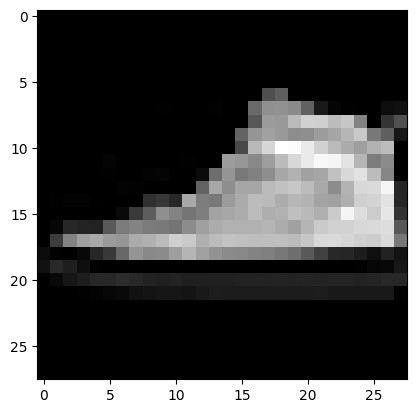

In [22]:
i = random.randint(1, 60000)
plt.imshow(training [i, 1:].reshape((28,28)), cmap = 'gray')

In [23]:
label = training[i, 0]

In [24]:
label

7.0

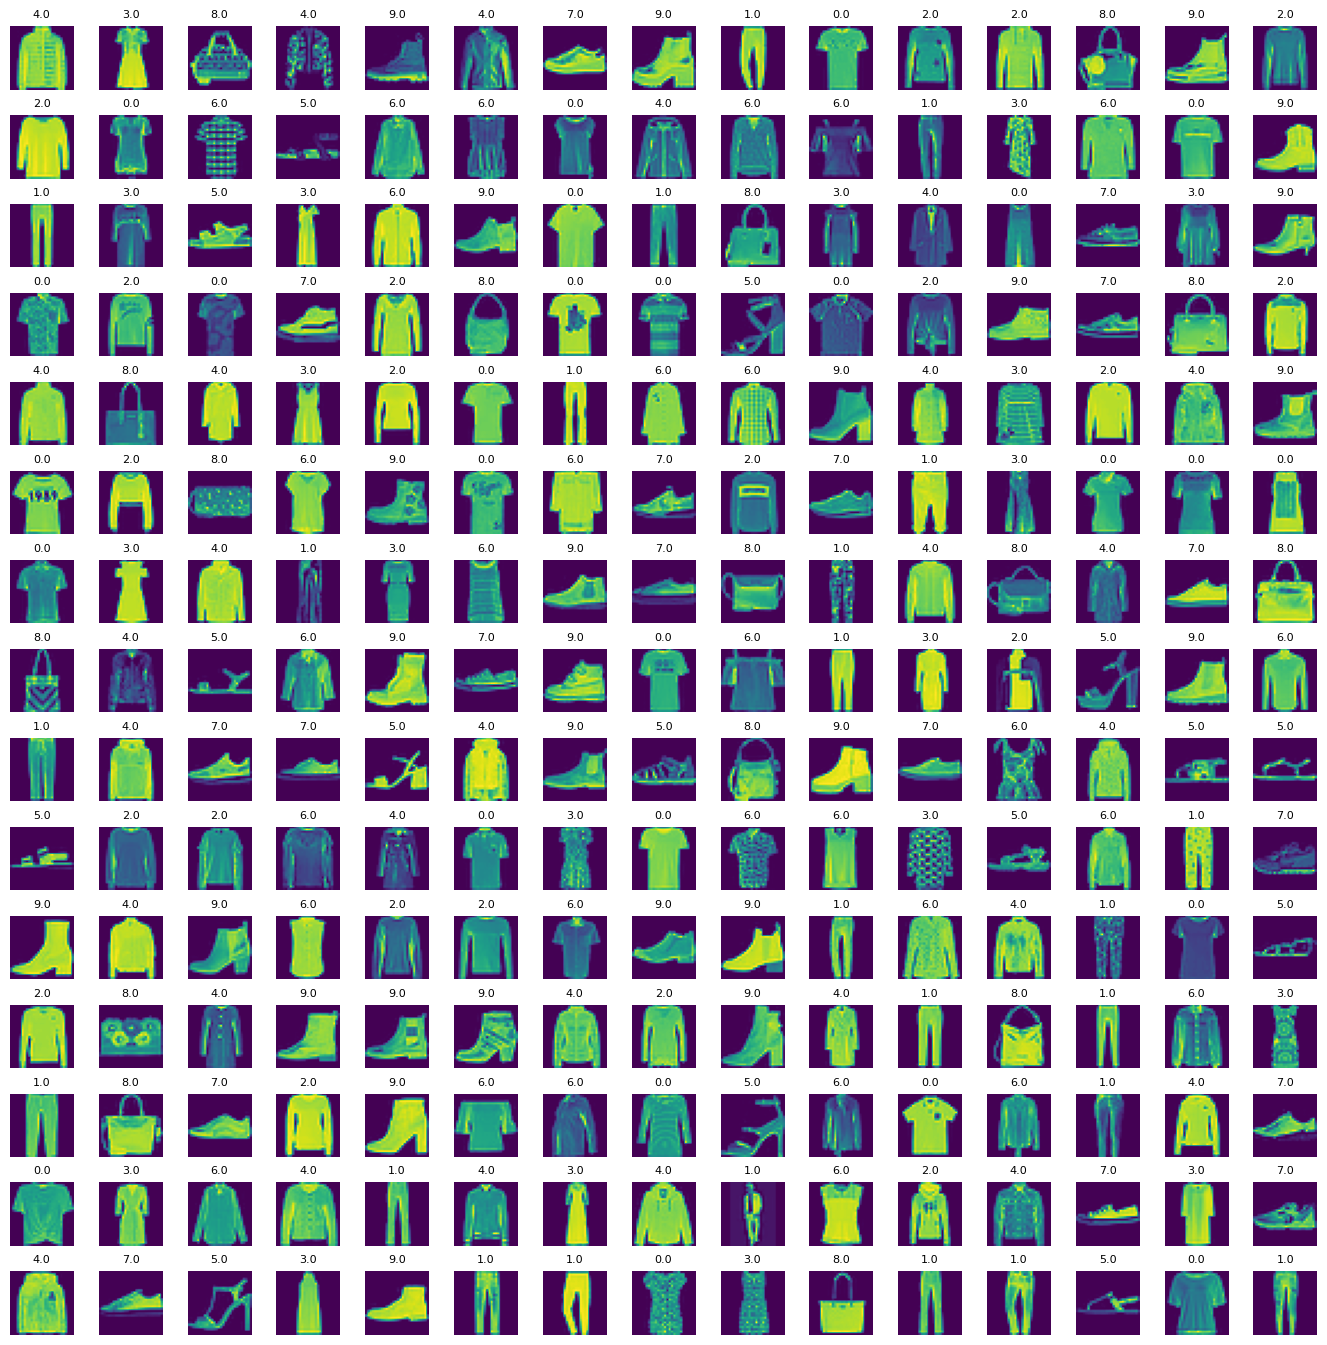

In [26]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):

  index = np.random.randint(0, n_training)
  axes[i].imshow( training[index,1:].reshape((28,28)) )
  axes[i].set_title(training[index,0], fontsize = 8)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [56]:
x_train = training[:,1:]/255
y_train = training[:,0]

In [57]:
x_test = testing[:,1:]/255
y_test = testing[:,0]

In [58]:
x_train.shape

(60000, 784)

In [59]:
y_train.shape

(60000,)

In [60]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))

In [61]:
x_train.shape

(60000, 28, 28, 1)

In [62]:
x_test.shape

(10000, 28, 28, 1)

In [63]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1) ))
cnn. add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))
cnn. add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))
cnn.add(layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [67]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [69]:
epochs_hist = cnn.fit(x_train, y_train, batch_size = 512, epochs = 150)

Epoch 1/150
118/118 [==============================] - 51s 433ms/step - loss: 0.5817 - accuracy: 0.7807
Epoch 2/150
118/118 [==============================] - 58s 494ms/step - loss: 0.4546 - accuracy: 0.8356
Epoch 3/150
118/118 [==============================] - 74s 632ms/step - loss: 0.3930 - accuracy: 0.8599
Epoch 4/150
118/118 [==============================] - 80s 675ms/step - loss: 0.3667 - accuracy: 0.8669
Epoch 5/150
118/118 [==============================] - 76s 645ms/step - loss: 0.3387 - accuracy: 0.8781
Epoch 6/150
118/118 [==============================] - 65s 555ms/step - loss: 0.3206 - accuracy: 0.8857
Epoch 7/150
118/118 [==============================] - 79s 665ms/step - loss: 0.3023 - accuracy: 0.8923
Epoch 8/150
118/118 [==============================] - 75s 639ms/step - loss: 0.2868 - accuracy: 0.8969
Epoch 9/150
118/118 [==============================] - 78s 658ms/step - loss: 0.2793 - accuracy: 0.8992
Epoch 10/150
118/118 [==============================] - 78s 658m

In [70]:
evaluation = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.6040 - accuracy: 0.9127


In [73]:
predicted_classes = np.argmax(cnn.predict(x_test), axis=-1)

313/313 [==============================] - 7s 21ms/step


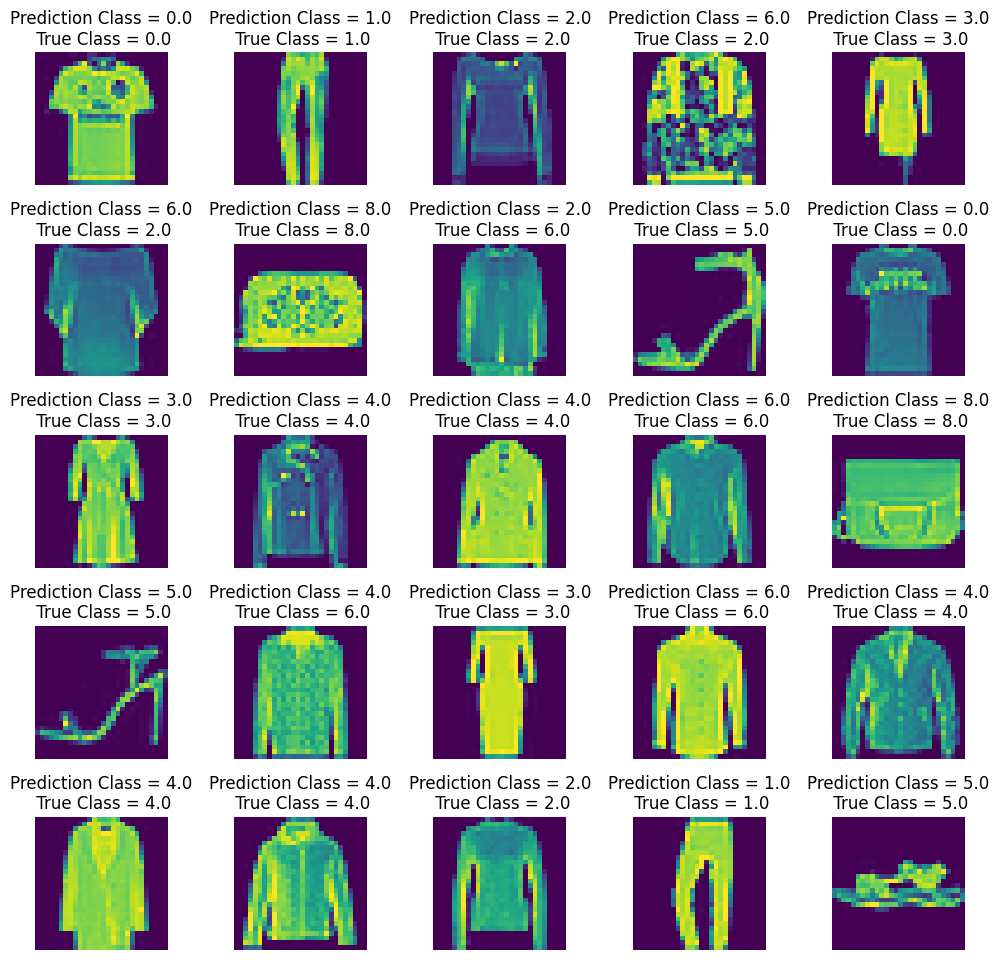

In [74]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(x_test[i].reshape(28,28))
  axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<Axes: >

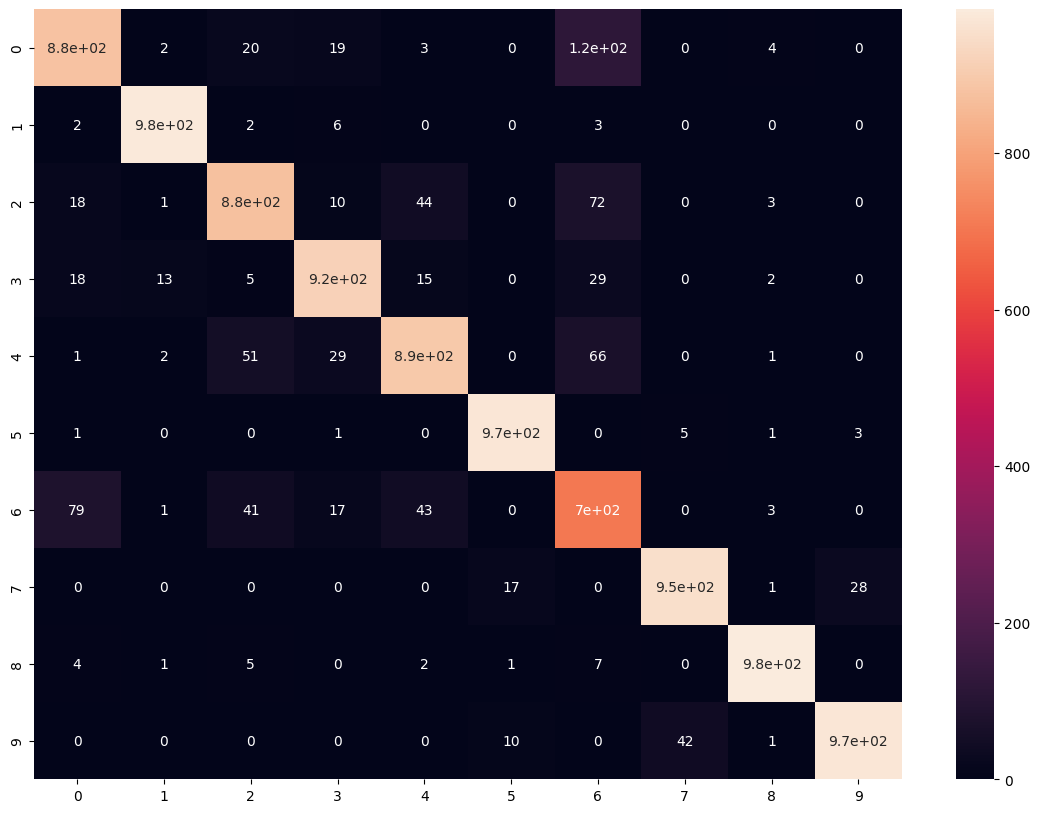

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)

In [79]:
from sklearn.metrics import classification_report

num_classes = 10

target_names = ['class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.88      0.86      1000
     class 1       0.99      0.98      0.98      1000
     class 2       0.86      0.88      0.87      1000
     class 3       0.92      0.92      0.92      1000
     class 4       0.86      0.89      0.87      1000
     class 5       0.99      0.97      0.98      1000
     class 6       0.79      0.70      0.75      1000
     class 7       0.95      0.95      0.95      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

